##### PAIR PROGRAMMING - REGRESIÓN LINEAL 3

In [1]:
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

# libreria para cambio de tipo de dato de string a lista
import ast

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?


##### RESPUESTA:

La principal diferencia entre la covarianza y la correlación, es que la covarianza muestra si ambas variables van en la misma dirección (puede ser positiva o negativa), mientras que  la correlación, además, nos informa de la intensidad de la relación entre variables. 

2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.


In [2]:
df = pd.read_csv('datos/pokePd.csv', index_col = 0)

In [4]:
df.drop(['Name', 'Type'], axis = 1, inplace = True)

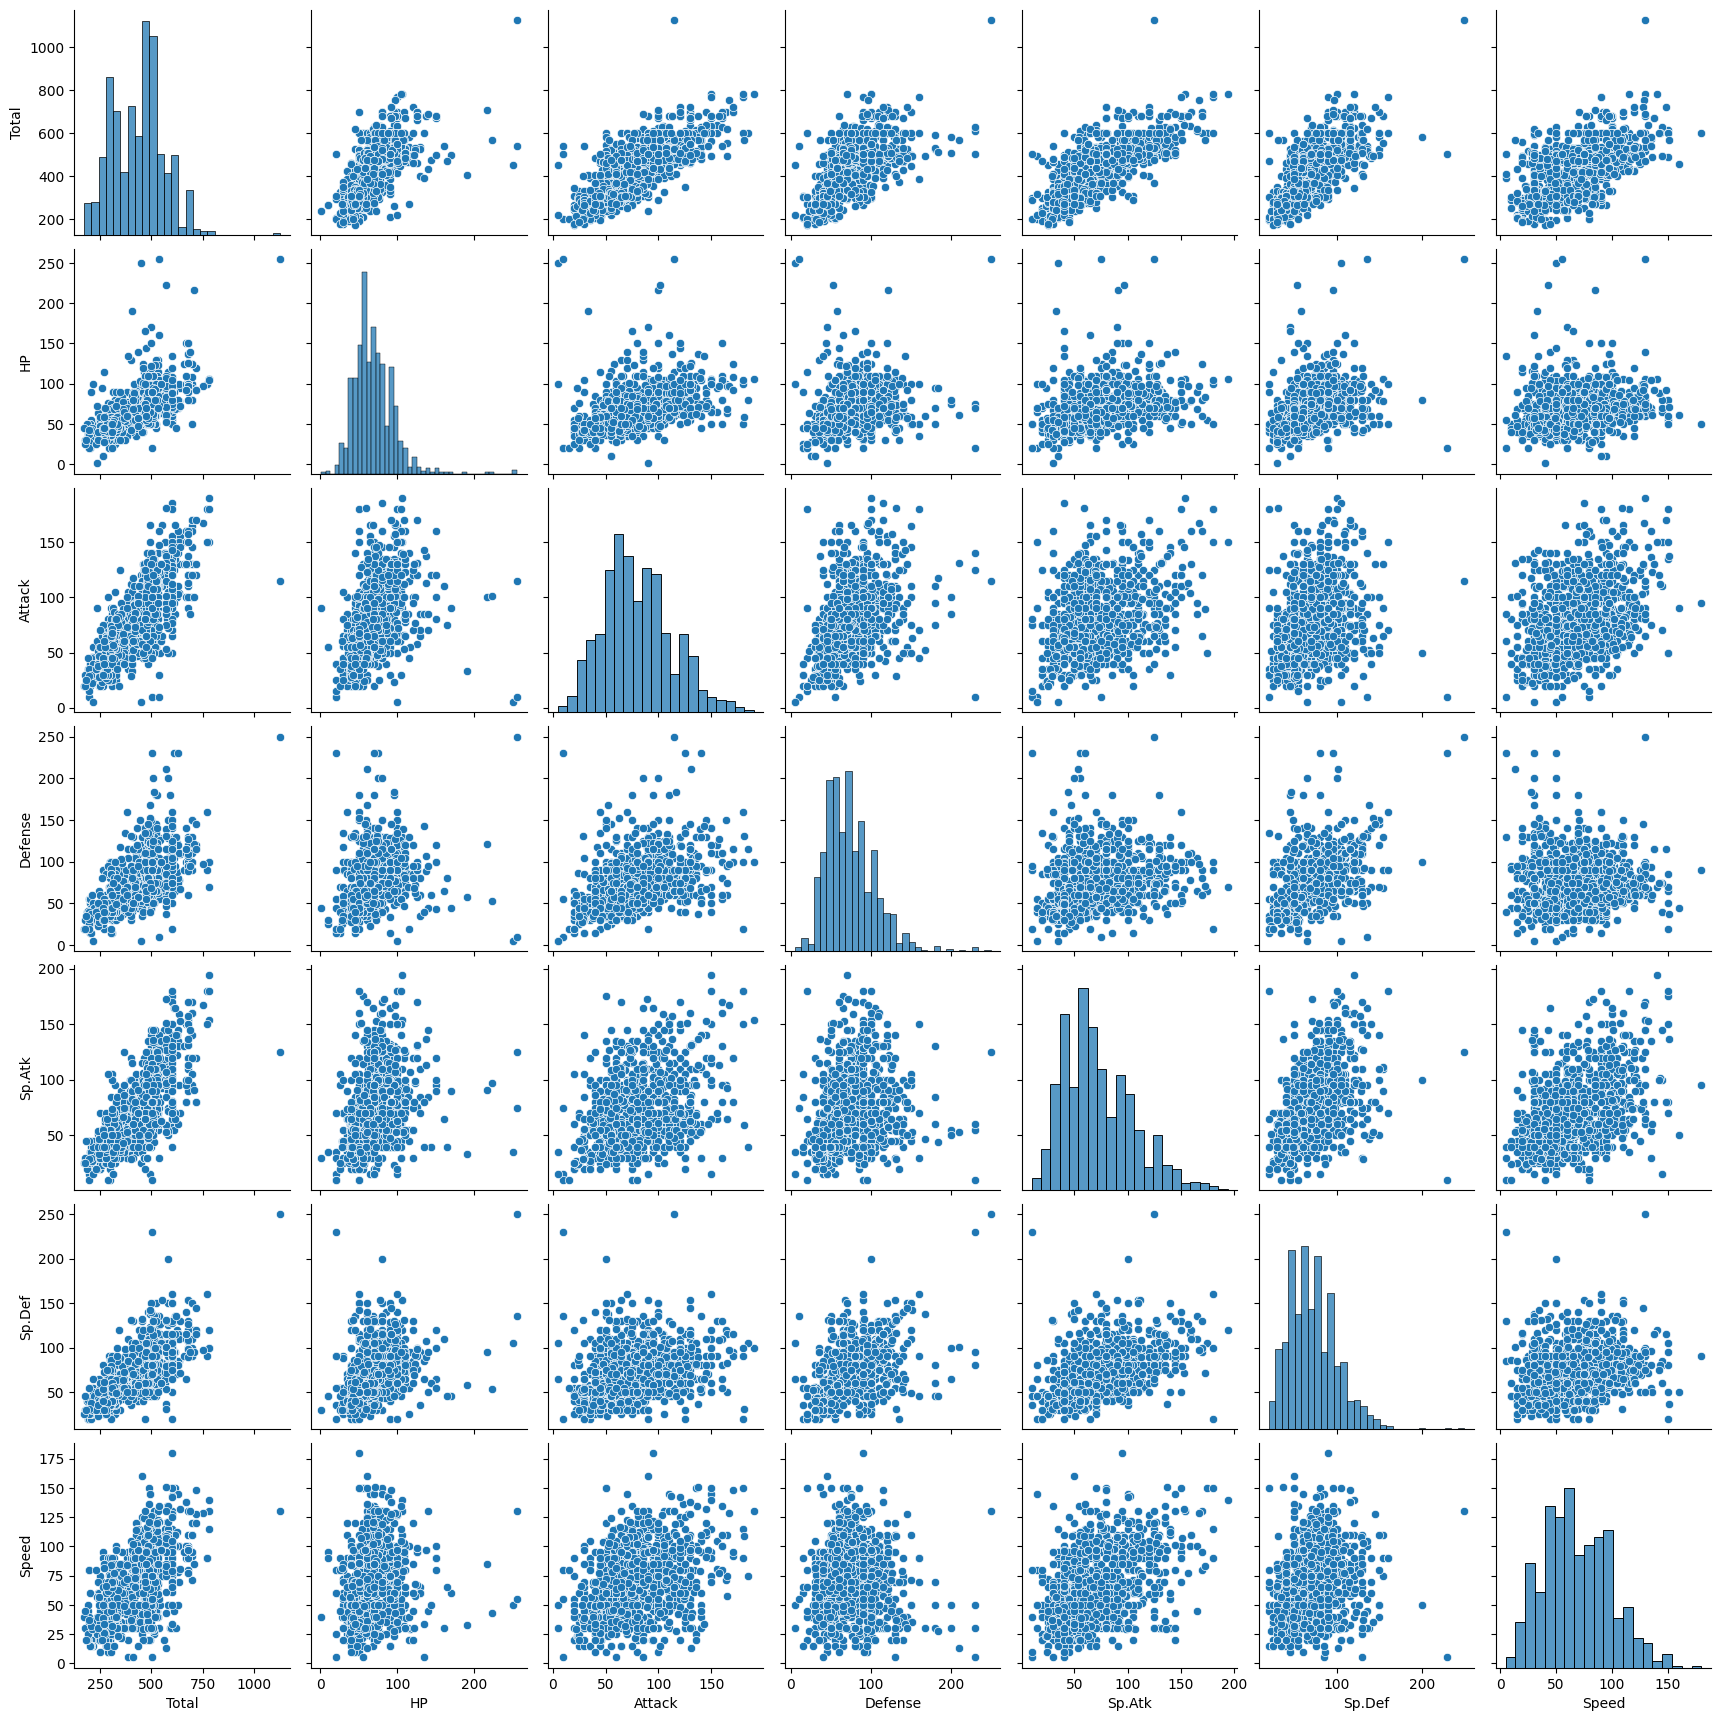

In [6]:
#Obtenemos el pairplot como apoyo visual 

sns.pairplot(df)

In [7]:
#Analíticamente
#Primero calculamos la covarianza y para ello, si hubiera variables categóricas, deberíamos obtener uno con únicamente las numéricas.

df.cov() #nos indica la dirección de la relación y vemos que son todas positivas: cuando aumenta el valor de una, lo hace el de la otra

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
Total,14780.609912,2086.870191,2890.225075,2401.185930,2901.468134,2456.454547,2044.406034
HP,2086.870191,696.277466,380.672597,251.565965,316.241823,293.757296,148.355044
Attack,2890.225075,380.672597,1047.659765,458.692986,394.108005,239.299241,369.792481
Defense,2401.185930,251.565965,458.692986,975.696720,230.910832,473.413970,10.905456
Sp.Atk,2901.468134,316.241823,394.108005,230.910832,1062.551900,468.703086,428.952489
Sp.Def,2456.454547,293.757296,239.299241,473.413970,468.703086,784.966501,196.314454
Speed,2044.406034,148.355044,369.792481,10.905456,428.952489,196.314454,890.086111


In [8]:
#Calculamos la correlación de Pearson

df.corr() #vemos también la dirección de la correlación y la intensidad de esa relación, 
#Un ejemplo sería la que se establece entre e ataque especial y el total (muy alta, porque pasa de 0.7)
#Asimismo, una relación alta podría considerarse aquellas entre 0.5 - 0.7 : la correlación entre la defensa y la defensa especial es de 0.54

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
Total,1.000000,0.650516,0.734472,0.632299,0.732144,0.721169,0.563644
HP,0.650516,1.000000,0.445708,0.305213,0.367666,0.397349,0.188450
Attack,0.734472,0.445708,1.000000,0.453685,0.373534,0.263879,0.382941
Defense,0.632299,0.305213,0.453685,1.000000,0.226784,0.540951,0.011702
Sp.Atk,0.732144,0.367666,0.373534,0.226784,1.000000,0.513212,0.441081
Sp.Def,0.721169,0.397349,0.263879,0.540951,0.513212,1.000000,0.234861
Speed,0.563644,0.188450,0.382941,0.011702,0.441081,0.234861,1.000000


3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.


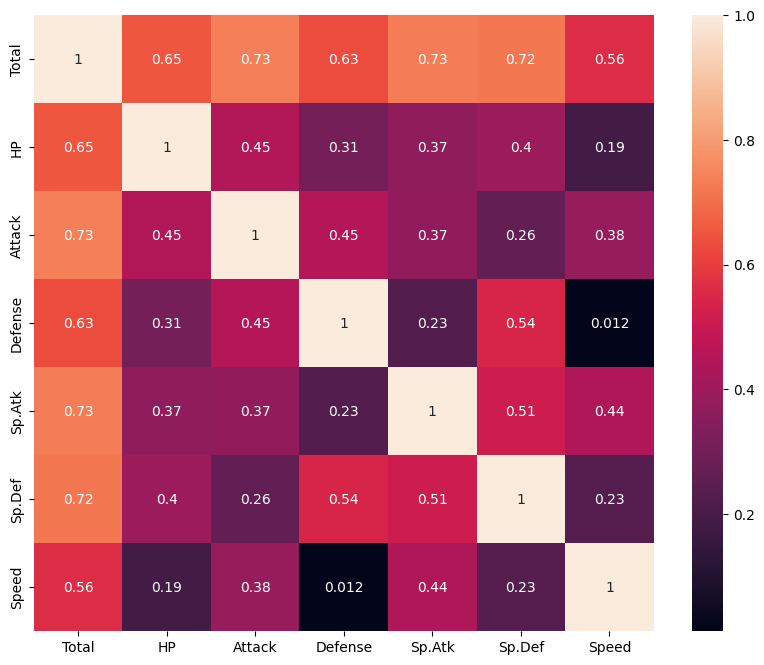

In [11]:
sns.heatmap(df.corr(),
             cmap = 'rocket',
             annot = True);

In [12]:
# Creamos un df todo de unos de la misma forma que nuestra matriz de correlación

mask = np.triu(np.ones_like(df.corr(),dtype = np.bool_))

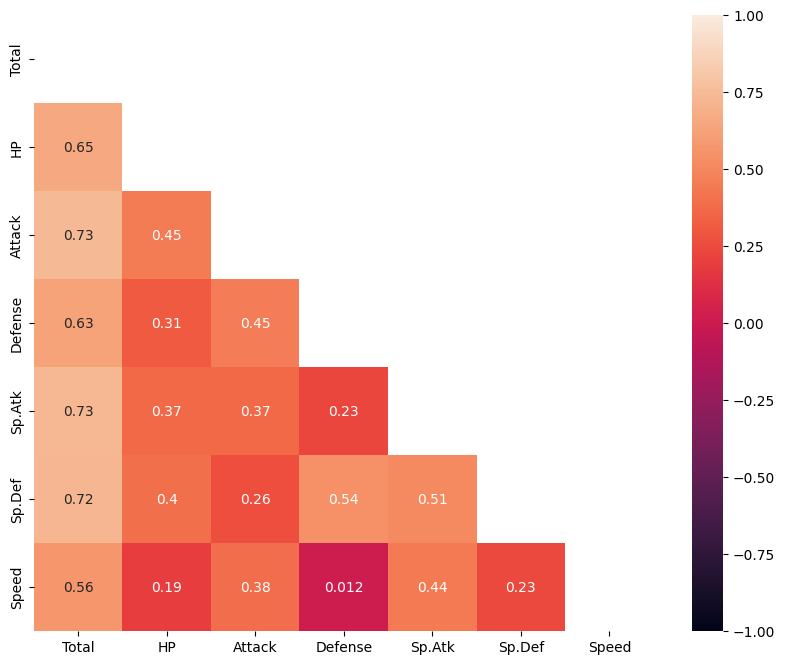

In [14]:
sns.heatmap(df.corr(),
             cmap = 'rocket',
             annot = True,
             mask = mask,
             vmin = -1,
             vmax= 1);

  ##### COMENTARIO
  
- Vemos que el ataque especial, el ataque y la defensa especial tienen una correlación muy alta con el total de puntos con el pokémon.
- También percibimos una corr alta entre la defensa y el total de puntos, que sería de 0.63, y entre la defensa y la defensa especial, que es de 0.54.
- Por ejemplo, vemos que apenas hay correlación entre la defensa y la velocidad, al ser practicamente el valor cercano a 0.

4. Guardad la gráfica del heatmap.

In [15]:
plt.savefig('mapa_calor_pokemon.png')

<Figure size 1000x800 with 0 Axes>